# Housing Prices: Can you predict the home sales prices in Melbourne?

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
dfHousePrices = pd.read_csv("house_prices.csv", usecols = ['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'Seller', 'Distance', 'Bedroom', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'RegionName', 'PropertyCount']) # Remove redundant/unique information

In [3]:
dfHousePrices.head()

,Suburb,Rooms,Type,Price,Method,Seller,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,RegionName,PropertyCount
0,Abbotsford,2,h,1480000,S,Biggin,2.5,2,1,1.0,202,NaN,NaN,Yarra,Northern Metropolitan,4019
1,Abbotsford,2,h,1035000,S,Biggin,2.5,2,1,0.0,156,79.0,1900.0,Yarra,Northern Metropolitan,4019
2,Abbotsford,3,h,1465000,SP,Biggin,2.5,3,2,0.0,134,150.0,1900.0,Yarra,Northern Metropolitan,4019
3,Abbotsford,3,h,850000,PI,Biggin,2.5,3,2,1.0,94,NaN,NaN,Yarra,Northern Metropolitan,4019
4,Abbotsford,4,h,1600000,VB,Nelson,2.5,3,1,2.0,120,142.0,2014.0,Yarra,Northern Metropolitan,4019


In [4]:
dfHousePrices.shape
dfHousePrices.describe() # This gives us a summary of the indicators

,Rooms,Price,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,PropertyCount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,7454.417378
std,0.955748,6.393107e+05,5.868725,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,4378.581772
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,249.000000
25%,2.000000,6.500000e+05,6.100000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,4380.000000
50%,3.000000,9.030000e+05,9.200000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,6555.000000
75%,3.000000,1.330000e+06,13.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,10331.000000
max,10.000000,9.000000e+06,48.100000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,21650.000000


In [5]:
# This command will check if types are correct (int, float, object/string)
dfHousePrices.dtypes
# Fortunately, all data was imported correctly

Suburb            object
Rooms              int64
Type              object
Price              int64
Method            object
Seller            object
Distance         float64
Bedroom            int64
Bathroom           int64
Car              float64
Landsize           int64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
RegionName        object
PropertyCount      int64
dtype: object

In [6]:
# sns.pairplot(dfHousePrices,hue='Suburb')

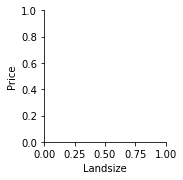

In [7]:
sns.pairplot(dfHousePrices,x_vars=['Landsize'],y_vars=['Price'])

## Clean data

In [8]:
import math
# We need to fill empty values on year built, built area and car
median_year_built = math.floor(dfHousePrices.YearBuilt.median())
median_year_built
dfHousePrices.YearBuilt = dfHousePrices.YearBuilt.fillna(median_year_built)

In [9]:
median_car = math.floor(dfHousePrices.Car.median())
median_car
dfHousePrices.Car = dfHousePrices.Car.fillna(median_car)

In [10]:
median_building_area = math.floor(dfHousePrices.BuildingArea.median())
median_building_area
dfHousePrices.BuildingArea = dfHousePrices.BuildingArea.fillna(median_building_area)

In [11]:
# For council area I don't want discrepancies with other location data, so rows with empty cells will get dropped
dfHousePrices = dfHousePrices[dfHousePrices['CouncilArea'].notna()]

In [12]:
dfHousePrices.describe(include='all') # Check data to see if we all empty cells are filled

,Suburb,Rooms,Type,Price,Method,Seller,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,RegionName,PropertyCount
count,12211,12211.000000,12211,1.221100e+04,12211,12211,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211,12211,12211.000000
unique,308,NaN,3,NaN,5,253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,8,NaN
top,Reservoir,NaN,h,NaN,S,Nelson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moreland,Southern Metropolitan,NaN
freq,323,NaN,8204,NaN,8111,1445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1163,4340,NaN
mean,NaN,2.894194,NaN,1.063692e+06,NaN,NaN,9.764368,2.868397,1.517402,1.574073,545.044550,135.619142,1966.709770,NaN,NaN,7452.984358
std,NaN,0.959341,NaN,6.388613e+05,NaN,NaN,5.507993,0.969456,0.688923,0.950699,4178.733246,96.939084,29.382804,NaN,NaN,4369.616618
min,NaN,1.000000,NaN,8.500000e+04,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,NaN,NaN,249.000000
25%,NaN,2.000000,NaN,6.400000e+05,NaN,NaN,5.900000,2.000000,1.000000,1.000000,161.000000,120.000000,1960.000000,NaN,NaN,4380.000000
50%,NaN,3.000000,NaN,8.950000e+05,NaN,NaN,9.200000,3.000000,1.000000,1.000000,401.000000,126.000000,1970.000000,NaN,NaN,6567.000000
75%,NaN,3.000000,NaN,1.320000e+06,NaN,NaN,12.600000,3.000000,2.000000,2.000000,645.000000,128.000000,1975.000000,NaN,NaN,10331.000000


In [13]:
# Delete rows with 0 as landsize
dfHousePrices = dfHousePrices[dfHousePrices.Landsize != 0]

In [14]:
dfHousePrices.describe(include='all') # Check data to see if we all empty cells are filled

,Suburb,Rooms,Type,Price,Method,Seller,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,RegionName,PropertyCount
count,10272,10272.000000,10272,1.027200e+04,10272,10272,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272,10272,10272.000000
unique,305,NaN,3,NaN,5,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,8,NaN
top,Reservoir,NaN,h,NaN,S,Nelson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moreland,Southern Metropolitan,NaN
freq,301,NaN,8033,NaN,7017,1239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1030,3303,NaN
mean,NaN,3.068536,NaN,1.142861e+06,NaN,NaN,10.402434,3.038162,1.570678,1.659073,647.930199,141.715375,1965.026967,NaN,NaN,7304.301889
std,NaN,0.899147,NaN,6.493972e+05,NaN,NaN,5.578720,0.916483,0.707189,0.985341,4548.807775,101.695480,30.162665,NaN,NaN,4392.989470
min,NaN,1.000000,NaN,1.310000e+05,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1196.000000,NaN,NaN,249.000000
25%,NaN,3.000000,NaN,7.100000e+05,NaN,NaN,6.700000,2.000000,1.000000,1.000000,258.000000,126.000000,1960.000000,NaN,NaN,4019.000000
50%,NaN,3.000000,NaN,9.675000e+05,NaN,NaN,9.850000,3.000000,1.000000,2.000000,516.000000,126.000000,1970.000000,NaN,NaN,6482.000000
75%,NaN,4.000000,NaN,1.400000e+06,NaN,NaN,13.000000,4.000000,2.000000,2.000000,670.000000,137.000000,1970.000000,NaN,NaN,9704.000000


In [15]:
dfHousePrices.to_csv(r'/Users/alejandrogleason/Downloads/CleanedHP.csv')

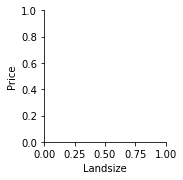

In [16]:
sns.pairplot(dfHousePrices,x_vars=['Landsize'],y_vars=['Price'])

<AxesSubplot:xlabel='Landsize', ylabel='Price'>

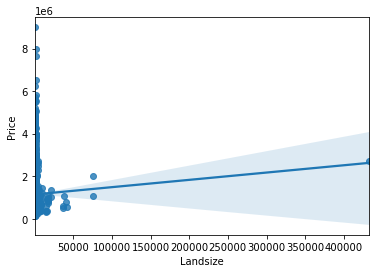

In [17]:
sns.regplot(data=dfHousePrices, x="Landsize",y="Price")

In [18]:
dfHousePrices.corr()

,Rooms,Price,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,PropertyCount
Rooms,1.000000,0.437348,0.210016,0.923591,0.583716,0.362429,-0.000972,0.278828,-0.018775,-0.062800
Price,0.437348,1.000000,-0.252168,0.410984,0.440762,0.188283,0.024035,0.249837,-0.247483,-0.017599
Distance,0.210016,-0.252168,1.000000,0.213945,0.089830,0.233346,0.001951,0.047015,0.251553,-0.043826
Bedroom,0.923591,0.410984,0.213945,1.000000,0.572382,0.358121,-0.000062,0.265493,-0.006567,-0.064897
Bathroom,0.583716,0.440762,0.089830,0.572382,1.000000,0.293069,0.026608,0.273033,0.129217,-0.042384
Car,0.362429,0.188283,0.233346,0.358121,0.293069,1.000000,0.012299,0.137302,0.105440,-0.009632
Landsize,-0.000972,0.024035,0.001951,-0.000062,0.026608,0.012299,1.000000,0.001024,0.016858,-0.001177
BuildingArea,0.278828,0.249837,0.047015,0.265493,0.273033,0.137302,0.001024,1.000000,0.022739,-0.021764
YearBuilt,-0.018775,-0.247483,0.251553,-0.006567,0.129217,0.105440,0.016858,0.022739,1.000000,-0.015472
PropertyCount,-0.062800,-0.017599,-0.043826,-0.064897,-0.042384,-0.009632,-0.001177,-0.021764,-0.015472,1.000000


<AxesSubplot:>

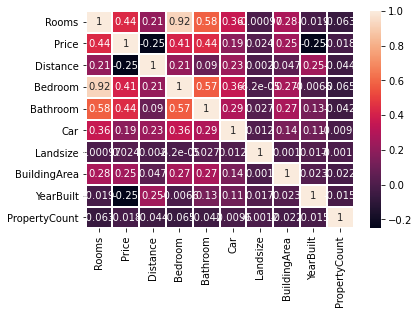

In [19]:
sns.heatmap(dfHousePrices.corr(),annot=True,lw=1)

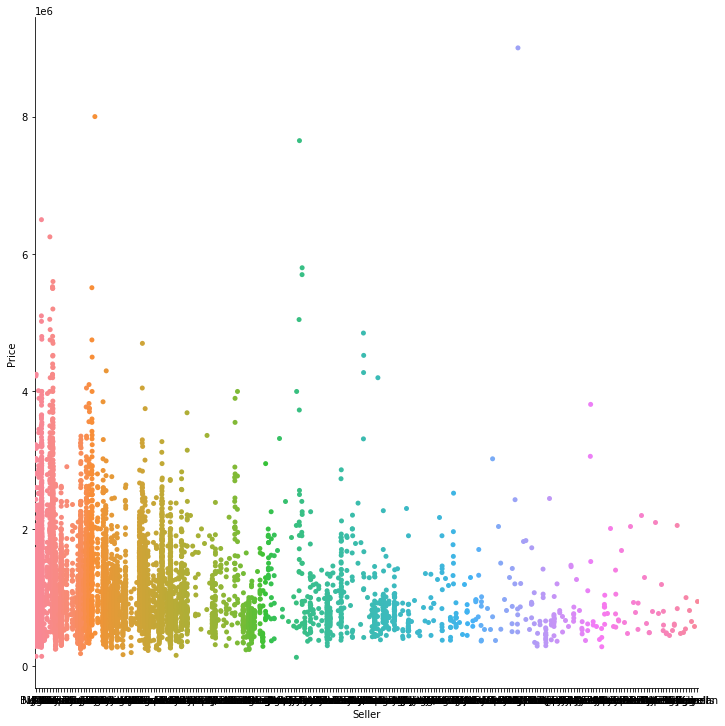

In [20]:
sns.catplot(x="Seller", y="Price", data=dfHousePrices, height=10)

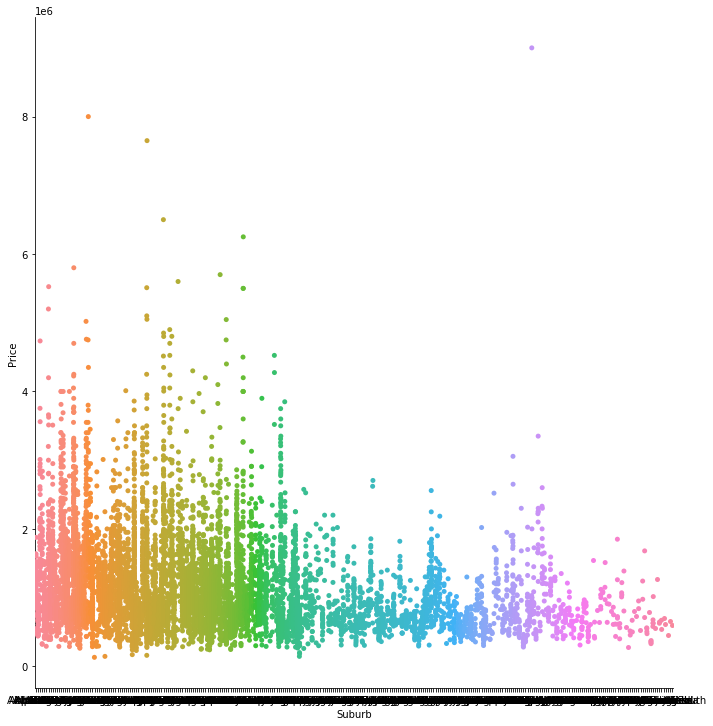

In [21]:
sns_plot = sns.catplot(x="Suburb", y="Price", data=dfHousePrices, height=10)
# sns_plot.savefig("output.png")

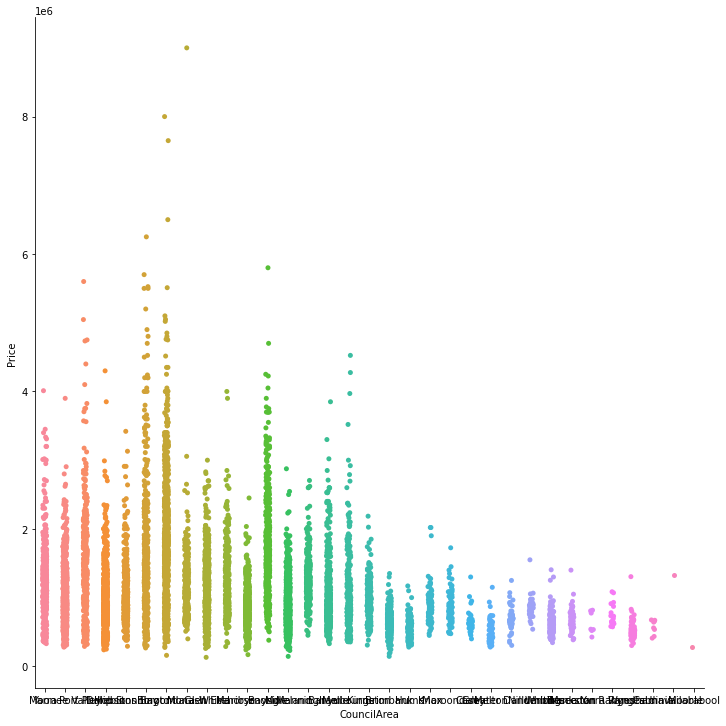

In [22]:
sns.catplot(x="CouncilArea", y="Price", data=dfHousePrices, height=10)

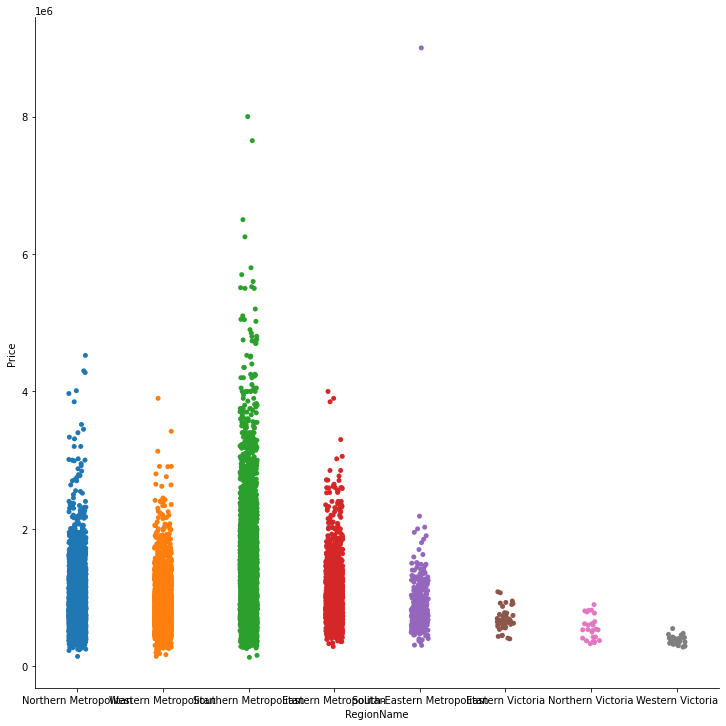

In [23]:
sns.catplot(x="RegionName", y="Price", data=dfHousePrices, height=10)

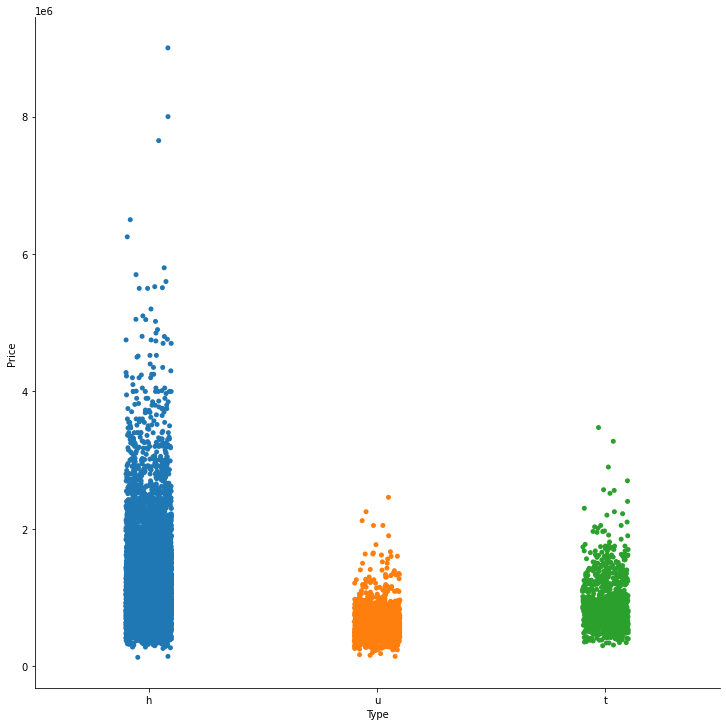

In [24]:
sns.catplot(x="Type", y="Price", data=dfHousePrices, height=10)

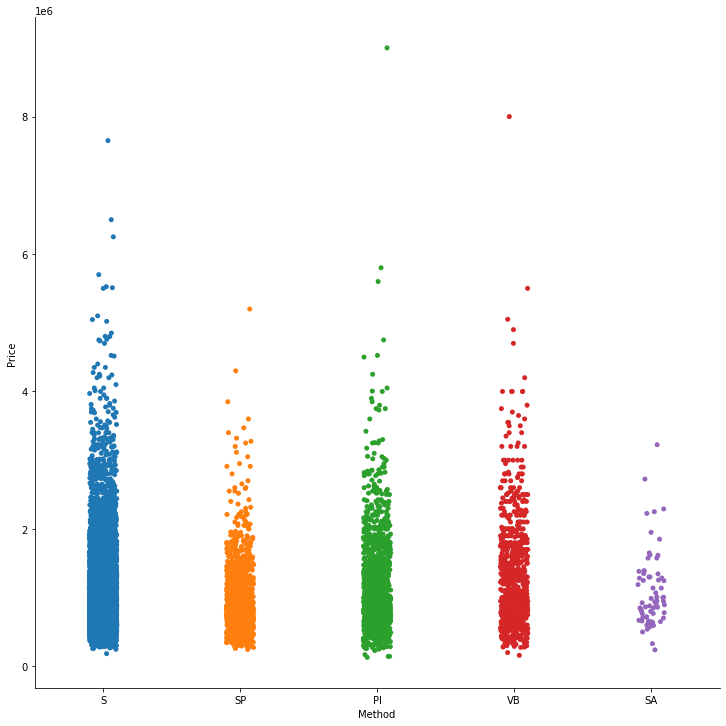

In [25]:
sns.catplot(x="Method", y="Price", data=dfHousePrices, height=10)

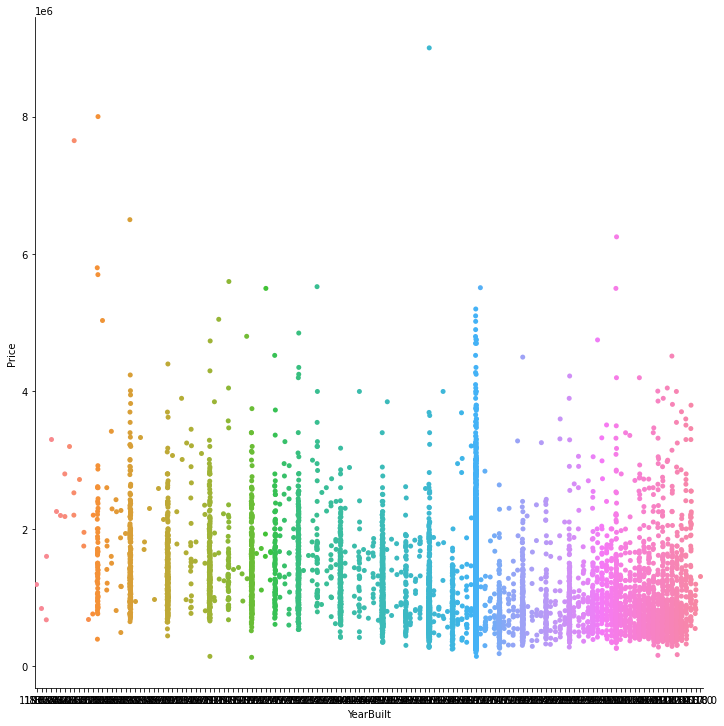

In [26]:
sns.catplot(x="YearBuilt", y="Price", data=dfHousePrices, height=10)

In [27]:
# Run this commands to check for typos on categorical data
unique_types_suburb = set(dfHousePrices['Suburb'].unique())
unique_types_suburb
unique_types_seller = set(dfHousePrices['Seller'].unique())
unique_types_seller
unique_types_council_area = set(dfHousePrices['CouncilArea'].unique())
unique_types_council_area
unique_types_region_name = set(dfHousePrices['RegionName'].unique())
unique_types_region_name
unique_types_type = set(dfHousePrices['Type'].unique())
unique_types_type
# Fortunately, there are no typos and unique values are correct

{'h', 't', 'u'}

In [28]:
# As our columns are clean now, it is safe to set them as categorical variables
dfHousePrices['Suburb'] = dfHousePrices['Suburb'].astype('category')

# Check that the results are in effect
# assert dfHousePrices['Suburb'].dtype == 'category'

In [29]:
dfHousePrices['Type'] = dfHousePrices['Type'].astype('category')
# assert dfHousePrices['Type'].dtype == 'category'

In [30]:
dfHousePrices['Method'] = dfHousePrices['Method'].astype('category')
# assert dfHousePrices['Method'].dtype == 'category'

In [31]:
dfHousePrices['Seller'] = dfHousePrices['Seller'].astype('category')
# assert dfHousePrices['Seller'].dtype == 'category'

In [32]:
dfHousePrices['CouncilArea'] = dfHousePrices['CouncilArea'].astype('category')
# assert dfHousePrices['CouncilArea'].dtype == 'category'

In [33]:
dfHousePrices['RegionName'] = dfHousePrices['RegionName'].astype('category')
# assert dfHousePrices['Regionname'].dtype == 'category'

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2

In [35]:
X = dfHousePrices[['Suburb', 'Rooms', 'Type', 'Method', 'Seller', 'Distance', 'Bedroom', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'RegionName', 'PropertyCount']]
y = dfHousePrices['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [36]:
# Check information has been corrected
dfHousePrices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10272 entries, 0 to 12212
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         10272 non-null  category
 1   Rooms          10272 non-null  int64   
 2   Type           10272 non-null  category
 3   Price          10272 non-null  int64   
 4   Method         10272 non-null  category
 5   Seller         10272 non-null  category
 6   Distance       10272 non-null  float64 
 7   Bedroom        10272 non-null  int64   
 8   Bathroom       10272 non-null  int64   
 9   Car            10272 non-null  float64 
 10  Landsize       10272 non-null  int64   
 11  BuildingArea   10272 non-null  float64 
 12  YearBuilt      10272 non-null  float64 
 13  CouncilArea    10272 non-null  category
 14  RegionName     10272 non-null  category
 15  PropertyCount  10272 non-null  int64   
dtypes: category(6), float64(4), int64(6)
memory usage: 1.3 MB


In [37]:
# List independent variables
#X = dfHousePrices[['Suburb', 'Rooms', 'Type', 'Method', 'Seller', 'Bedroom', 'Bathroom', 'BuildingArea', 'CouncilArea', 'Regionname']]
X = dfHousePrices[['Rooms', 'Distance', 'Bedroom', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Suburb', 'Type', 'Method', 'YearBuilt']]
# Add dummy vars for cat vars
X = pd.get_dummies(data=X, drop_first=True)
# New dataframe
X.head()

,Rooms,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Suburb_Aberfeldie,Suburb_Airport West,...,Suburb_Wyndham Vale,Suburb_Yallambie,Suburb_Yarra Glen,Suburb_Yarraville,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB
0,2,2.5,2,1,1.0,202,126.0,1970.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2,2.5,2,1,0.0,156,79.0,1900.0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,2.5,3,2,0.0,134,150.0,1900.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,2.5,3,2,1.0,94,126.0,1970.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2.5,3,1,2.0,120,142.0,2014.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
# Dependent variable
Y = dfHousePrices['Price']
Y

0        1480000
1        1035000
2        1465000
3         850000
4        1600000
          ...   
12206    1050000
12208    1285000
12210     525300
12211     750000
12212    2450000
Name: Price, Length: 10272, dtype: int64

## Build multiple linear regression model

In [39]:
from sklearn.model_selection import train_test_split
# Create the test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6882, 318)
(3390, 318)
(6882,)
(3390,)


In [40]:
from sklearn.linear_model import LinearRegression
# Perform the regression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [41]:
# Print the intercept
print(model.intercept_)

3545354.9253910454


In [42]:
# Print all other parameters
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Rooms,152163.742069
Distance,-49412.004089
Bedroom,12140.950257
Bathroom,167138.764108
Car,61311.580272
...,...
Type_u,-437785.359103
Method_S,109090.160598
Method_SA,88927.675508
Method_SP,75050.474323


In [43]:
predictions = model.predict(X_test)
predictions

array([1181270.959199  , 1228520.14107299, 1304819.94706009, ...,
       1830061.64713336,  958915.80182224,  102451.39128327])

<AxesSubplot:ylabel='Price'>

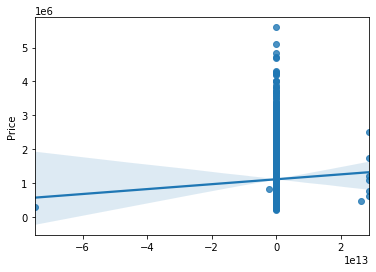

In [44]:
sns.regplot(x=predictions, y=y_test)

In [45]:
print('Coefficient: ', model.coef_)

Coefficient:  [ 1.52163742e+05 -4.94120041e+04  1.21409503e+04  1.67138764e+05
  6.13115803e+04  2.63661426e+00  4.18724904e+02 -1.58039736e+03
  3.38746233e+05  1.42119085e+05 -1.16550189e+05  8.23258570e+05
  3.31631050e+04  4.15839885e+05  2.72538060e+05  9.15029200e+04
 -1.31290643e+05 -8.19592924e+04  9.35548142e+05 -4.37408706e+03
  7.02478785e+05  3.40466671e+05  5.74564955e+05  4.68263722e+05
 -1.03820236e+05 -7.48896127e+13  2.83380440e+05  9.10686345e+05
  6.69265012e+05  4.62238152e+05  6.78380235e+05  9.26698138e+05
  9.34518615e+05  7.27192873e+05 -4.72352635e+04  4.91942967e+05
  4.19314780e+05  7.68810185e+05  2.88829921e+13  4.64140340e+05
  2.71822705e+05  4.69728479e+05 -2.08646603e+12  6.06408743e+05
  6.59609750e+05 -1.56899874e+05  3.53078254e+05  1.16129062e+06
  6.01005986e+05 -1.26902658e+05  2.61417605e+13  4.33274775e+03
  4.57893448e+04  8.08457340e+04 -5.08893423e+04  1.50838717e+05
  1.53859012e+06 -1.58811560e+05  8.13391130e+04 -2.34989621e+05
  4.1345432

In [46]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     44.11
Date:                Sat, 30 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:28:14   Log-Likelihood:                -98305.
No. Observations:                6882   AIC:                         1.972e+05
Df Residuals:                    6577   BIC:                         1.993e+05
Df Model:                         304                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 